<a href="https://colab.research.google.com/github/sims-smis/Summer-Research/blob/main/Linear_regression_on_sklearn_diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



diabetes = load_diabetes()

# target in this dataset :- quantitative measure of disease progression one year after the baseline
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'] + ['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


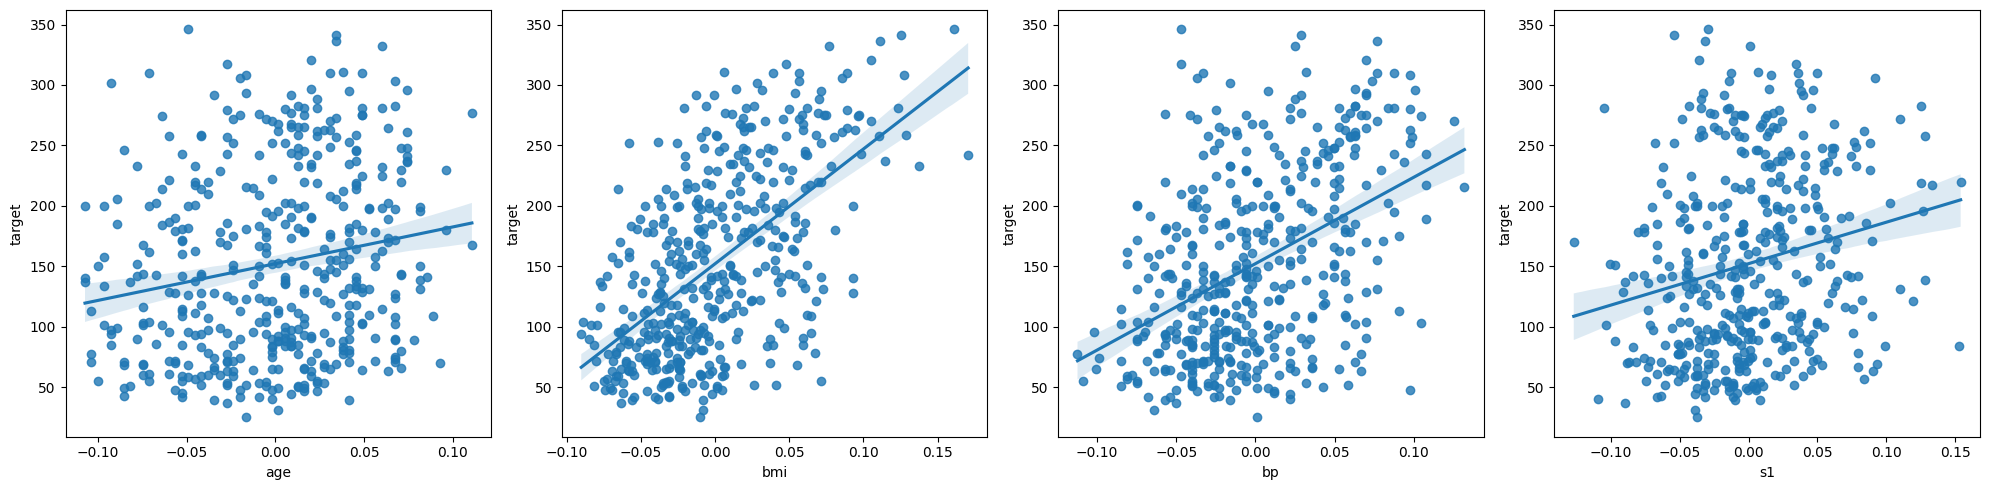

In [27]:
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))


# Plots for features vs actual target value

# Plot 1: Age vs Target
sns.regplot(x="age", y="target", data=df, ax=axes[0])
axes[0].set_xlabel('age')
axes[0].set_ylabel('target')

# Plot 2: BMI vs Target
sns.regplot(x="bmi", y="target", data=df, ax=axes[1])
axes[1].set_xlabel('bmi')
axes[1].set_ylabel('target')

# Plot 3: Blood Pressure (bp) vs Target
sns.regplot(x="bp", y="target", data=df, ax=axes[2])
axes[2].set_xlabel('bp')
axes[2].set_ylabel('target')

# Plot 4: s1 vs Target
sns.regplot(x="s1", y="target", data=df, ax=axes[3])
axes[3].set_xlabel('s1')
axes[3].set_ylabel('target')

plt.tight_layout()
plt.show()

In [30]:

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=49)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
print("coeff ", lr_model.coef_)
print("intercept ", lr_model.intercept_)

y_pred = lr_model.predict(X_test)

coeff  [   9.92571933 -237.96174999  548.49587983  268.86577423 -656.70644955
  457.6498057    -1.1769682    29.54948741  766.32842624   46.28536045]
intercept  153.16319402535592


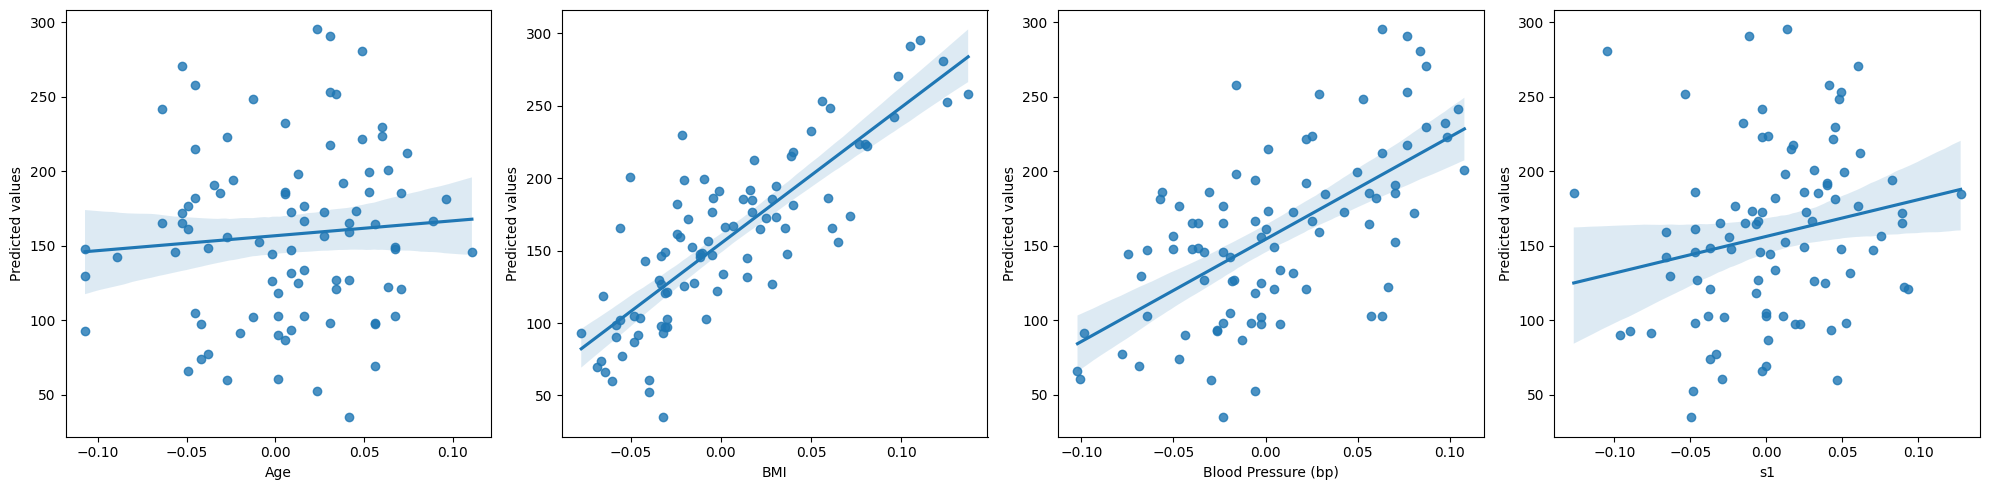

In [31]:
# Plot features vs predicted values
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot 1: Age vs Predicted values
sns.regplot(x=X_test['age'], y=y_pred, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Predicted values')

# Plot 2: BMI vs Predicted values
sns.regplot(x=X_test['bmi'], y=y_pred, ax=axes[1])
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Predicted values')

# Plot 3: Blood Pressure (bp) vs Predicted values
sns.regplot(x=X_test['bp'], y=y_pred, ax=axes[2])
axes[2].set_xlabel('Blood Pressure (bp)')
axes[2].set_ylabel('Predicted values')

# Plot : s1 vs Predicted values
sns.regplot(x=X_test['s1'], y=y_pred, ax=axes[3])
axes[3].set_xlabel('s1')
axes[3].set_ylabel('Predicted values')

plt.tight_layout()
plt.show()

Mean squared error:  2082.686329787976
R2 score:  0.6091283134674541


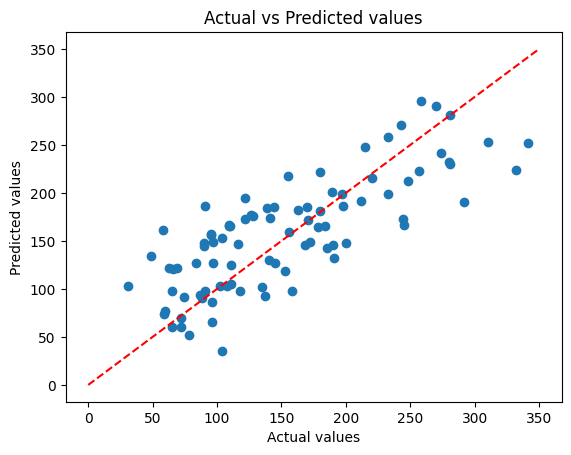

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Plot for actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([0, 350], [0, 350], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()